In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sb
import numpy as np
import warnings
import scipy.optimize as so
import scipy.integrate as inn
from scipy.special import factorial as fac
warnings.filterwarnings("ignore")

## $Bern(p), \quad p = k / 10 , \quad k = 1, \cdots ,8$

In [42]:
def painless(static,p,n,sigm,m):
    f = lambda x: -abs(static.cdf(x * sigm*n**(1/2) - n*m) - sps.norm(0,1).cdf(x))
    f_min = so.minimize(f,1)
    return -f_min['fun']
def sugar(p,sigm,n):
    return sigm**3*n**(1/2)/((1-p)**3*p+p**3*(1-p))

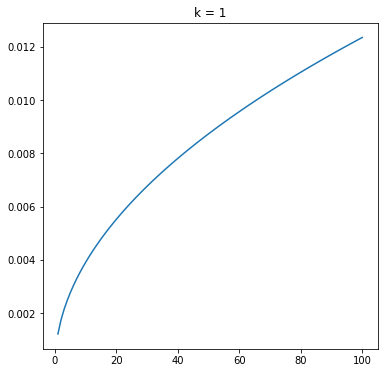

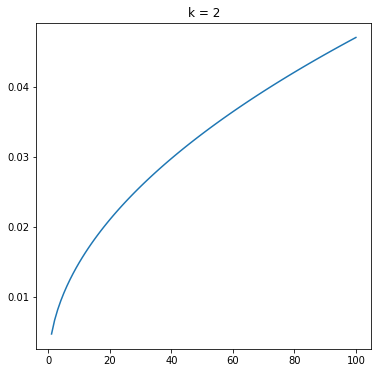

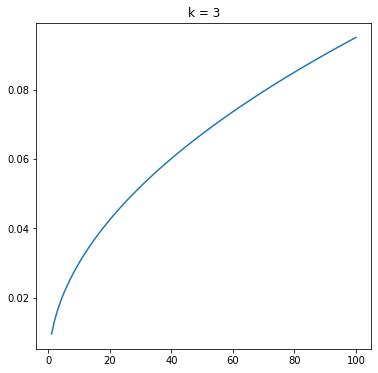

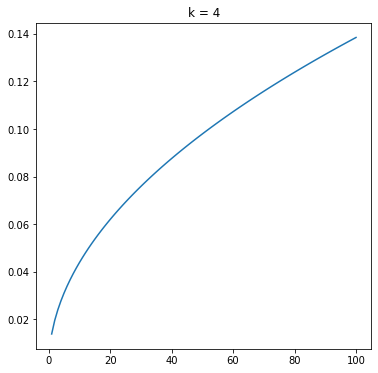

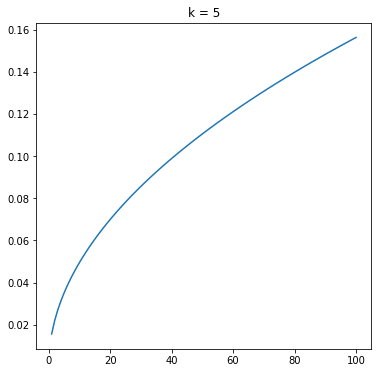

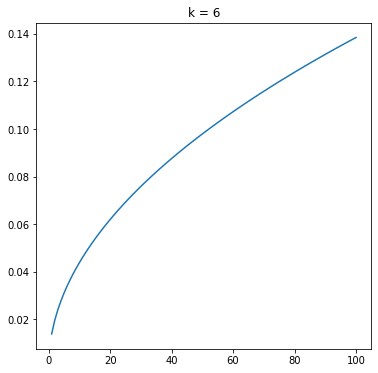

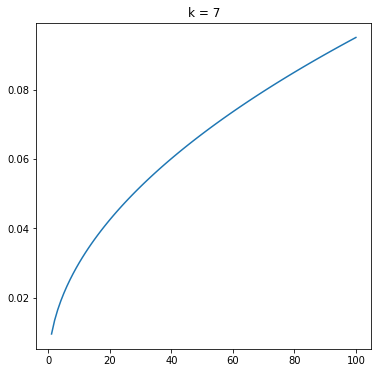

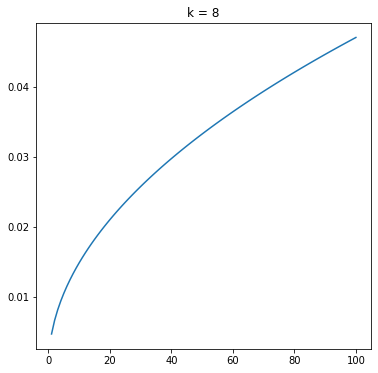

In [44]:
for k in range(1,9):
    p = k / 10
    l = []
    for n in range(1,101):
        a = painless(sps.binom(n=n,p=p),p,n,(p*(1-p))**1/2,p)*sugar(p,(p*(1-p))**1/2,n)
        l.append(a)
    plt.figure(figsize = (6,6))
    plt.plot(list(range(1,101)),l)
    plt.title(label = 'k = ' + str(k))
    plt.show()

## $U(0,1)$

In [158]:
def irwin_hall(x,n):
    if x >= n:
        return 1
    if x >= 0:
        return sum([(-1)**k*(x-k)**(n)/(np.math.factorial(k)*np.math.factorial(n-k)) for k in range(int(x)+1)])
    return 0

In [159]:
def painless(n,sigm,m):
    f = lambda x: -abs(irwin_hall(x * sigm*n**(1/2) - n*m,n) - sps.norm(0,1).cdf(x))
    f_min = so.minimize(f,1)
    return -f_min['fun']

In [160]:
def sugar(m,sigm,n):
    return sigm**3*n**(1/2)/inn.quad(lambda x : abs(x-m)**3*x,0,1)[0]

In [2]:
m = sps.uniform().mean()
sigm = sps.uniform.std()

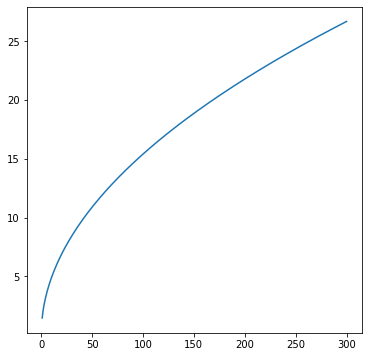

In [164]:
l = []
for n in range(1,301):
    a = painless(n,sigm,m)*sugar(m,sigm,n)
    l.append(a)
plt.figure(figsize = (6,6))
plt.plot(list(range(1,301)),l)
plt.show()

##  $Exp(1)$ 

In [169]:
def painless(n,sigm,m):
    f = lambda x: -abs(sps.gamma(a=n).cdf(x * sigm*n**(1/2) - n*m) - sps.norm(0,1).cdf(x))
    f_min = so.minimize(f,1)
    return -f_min['fun']

In [170]:
def sugar(m,sigm,n):
    return sigm**3*n**(1/2)/inn.quad(lambda x : abs(x-m)**3*sps.expon.pdf(x),0,np.inf)[0]

In [171]:
m = sps.expon().mean()
sigm = sps.expon().std()

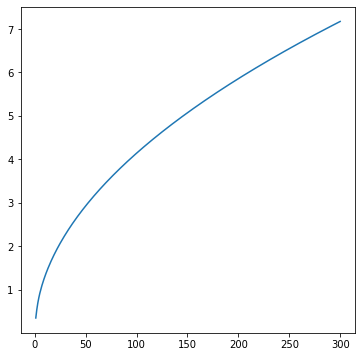

In [172]:
l = []
for n in range(1,301):
    a = painless(n,sigm,m)*sugar(m,sigm,n)
    l.append(a)
plt.figure(figsize = (6,6))
plt.plot(list(range(1,301)),l)
plt.show()

## $Gamma(k,1)$

In [181]:
def painless(n,sigm,m,k):
    f = lambda x: -abs(sps.gamma(a=n*k).cdf(x * sigm*n**(1/2) - n*m) - sps.norm(0,1).cdf(x))
    f_min = so.minimize(f,1)
    return -f_min['fun']

In [182]:
def sugar(m,sigm,n,k,integr):
    return sigm**3*n**(1/2)/integr

In [183]:
k = 10
m = sps.gamma(k).mean()
sigm = sps.gamma(k).std()

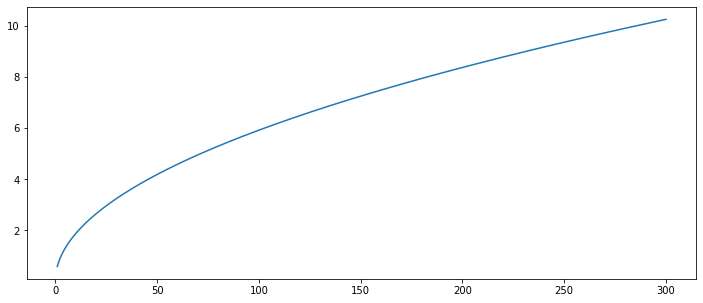

In [187]:
l = []
integr = inn.quad(lambda x : abs(x-m)**3*sps.gamma(k).pdf(x),0,np.inf)[0]
for n in range(1,301):
    a = painless(n,sigm,m,k)*sugar(m,sigm,n,k,integr)
    l.append(a)
plt.figure(figsize = (12,5))
plt.plot(list(range(1,301)),l)
plt.show()